In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
#normalize
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x:
    (x-x.min())/(x.max()-x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
import tensorflow as tf

C:\Users\ninja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [12]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [13]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

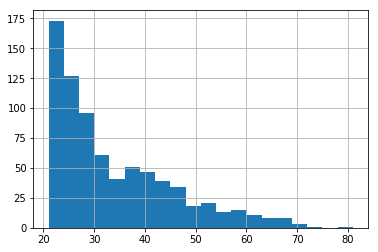

In [15]:
diabetes['Age'].hist(bins=20)

In [16]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [18]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree, assigned_group, age_bucket]

In [19]:
#train test split
x_data = diabetes.drop('Class',axis=1)

In [20]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [21]:
labels = diabetes['Class']

In [22]:
#Labels

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3, random_state=101)

In [28]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                batch_size=10,num_epochs=1000, shuffle=True)

In [29]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ninja\\AppData\\Local\\Temp\\tmpss8a0ttx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002E52119FA90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ninja\AppData\Local\Temp\tmpss8a0ttx\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 97.8899
INFO:tensorflow:loss = 5.9062757, step = 101 (1.027 sec)
INFO:tensorflow:global_step/sec: 179.166
INFO:tensorflow:loss = 4.1277146, step = 201 (0.558 sec)
INFO:tensorflow:global_step/sec: 172.966
INFO:tensorflow:loss = 3.9583383, step = 301 (0.574 sec)
INFO:tensorflow:global_step/sec: 214.536
INFO:tensorflow:loss = 7.5835476, step = 401 (0.467 sec)
INFO:tensorflow:global_step/sec: 189.347
INFO:tensorflow:loss = 5.4390426, step = 501 (0.535 sec)
INFO:tensorflow:global_step/sec: 165.248
INFO:tensorflow:loss = 7.5878744, step = 601 (0.608 sec)
INFO:tensorflow:global_step/s

In [31]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
        batch_size=10,num_epochs=1, shuffle=False)

In [32]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-25-20:47:57
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ninja\AppData\Local\Temp\tmpss8a0ttx\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-25-20:47:59
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.7987243, auc_precision_recall = 0.63544416, average_loss = 0.5282427, global_step = 1000, label/mean = 0.35064936, loss = 5.084336, precision = 0.6615385, prediction/mean = 0.35989958, recall = 0.5308642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\ninja\AppData\Local\Temp\tmpss8a0ttx\model.ckpt-1000


In [33]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7987243,
 'auc_precision_recall': 0.63544416,
 'average_loss': 0.5282427,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.084336,
 'precision': 0.6615385,
 'prediction/mean': 0.35989958,
 'recall': 0.5308642}

In [34]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
        batch_size=10,num_epochs=1, shuffle=False)

In [35]:
predictions = model.predict(pred_input_func)

In [36]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ninja\AppData\Local\Temp\tmpss8a0ttx\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [37]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5449301], dtype=float32),
  'logits': array([0.1802066], dtype=float32),
  'probabilities': array([0.45506987, 0.5449301 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.60801715], dtype=float32),
  'logits': array([0.43898493], dtype=float32),
  'probabilities': array([0.39198288, 0.60801715], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.37233993], dtype=float32),
  'logits': array([-0.5221915], dtype=float32),
  'probabilities': array([0.6276601 , 0.37233993], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.34299058], dtype=float32),
  'logits': array([-0.6499953], dtype=float32),
  'probabilities': array([0.6570094, 0.3429906], dtype=float32)},
 {'class_ids

In [38]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ninja\\AppData\\Local\\Temp\\tmpoux3rjn2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002E52174AE80>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
dnn_model.train(input_fn = input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [40]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [41]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree, embedded_group_col, age_bucket]

In [42]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10
            ,num_epochs=1000,shuffle=True)

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],
    feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ninja\\AppData\\Local\\Temp\\tmpbdxtssj0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002E5245B1C88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ninja\AppData\Local\Temp\tmpbdxtssj0\model.ckpt.
INFO:tensorflow:loss = 7.143066, step = 1
INFO:tensorflow:global_step/sec: 106.606
INFO:tensorflow:loss = 7.932405, step = 101 (0.945 sec)
INFO:tensorflow:global_step/sec: 201.561
INFO:tensorflow:loss = 6.5403295, step = 201 (0.497 sec)
INFO:tensorflow:global_step/sec: 158.672
INFO:tensorflow:loss = 3.9064035, step = 301 (0.630 sec)
INFO:tensorflow:global_step/sec: 197.215
INFO:tensorflow:loss = 5.933132, step = 401 (0.504 sec)
INFO:tensorflow:global_step/sec: 187.219
INFO:tensorflow:loss = 5.6983185, step = 501 (0.530 sec)
INFO:tensorflow:global_step/sec: 199.95
INFO:tensorflow:loss = 5.0979996, step = 601 (0.500 sec)
INFO:tensorflow:global_step/sec:

In [45]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                            batch_size=10,num_epochs=1,shuffle=False)

In [47]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-25-21:01:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ninja\AppData\Local\Temp\tmpbdxtssj0\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-25-21:01:42
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.8309053, auc_precision_recall = 0.6866789, average_loss = 0.47857252, global_step = 1000, label/mean = 0.35064936, loss = 4.606261, precision = 0.6708861, prediction/mean = 0.354656, recall = 0.654321
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\ninja\AppData\Local\Temp\tmpbdxtssj0\model.ckpt-1000


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8309053,
 'auc_precision_recall': 0.6866789,
 'average_loss': 0.47857252,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.606261,
 'precision': 0.6708861,
 'prediction/mean': 0.354656,
 'recall': 0.654321}